# Cycle-Based Arrival-Departure Plot, Delay/Vehicle and Total Delay 

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = '/Volumes/GoogleDrive/My Drive/!STRIDE_Signal_Data_Fusion/Data/UDOT_Big_Data_Challenge/Relevant_Works/Method 2/Arrival_departure_data.csv'
df1 = pd.read_csv(path)
df1.head()

,Unnamed: 0,ID,Datetime,Event_code,Event_parameter,datetime_format,hr,Cycle,Sec
0,5,7181.0,2018-11-06 00:00:35.300,82.0,4.0,2018-11-06 00:00:35.2,0.0,0.0,35.3
1,0,7181.0,2018-11-06 00:00:41.000,82.0,4.0,2018-11-06 00:00:41,0.0,0.0,41.0
2,8,7181.0,2018-11-06 00:00:44.100,82.0,42.0,2018-11-06 00:00:44.0,0.0,0.0,44.1
3,14,7181.0,2018-11-06 00:01:16.500,82.0,4.0,2018-11-06 00:01:16.5,0.0,0.0,76.5
4,15,7181.0,2018-11-06 00:01:24.400,82.0,42.0,2018-11-06 00:01:24.4,0.0,0.0,84.4


Enter Cycle Number: 549
Cycle delay in seconds:  272.40000000000873
Per vehicle delay in seconds:  12.971428571428987


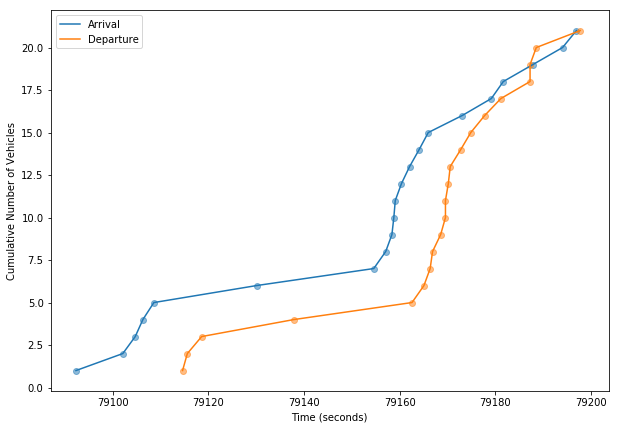

In [219]:
# Get cycle delay and plot arrival-departure curve

# Ask for cycle number
C = int(input('Enter Cycle Number: '))

# Calculate cycle delay and plot the curves
def Cycle_arrival_departure_curve():
    df1_a = df1.where((df1['Cycle']==C) & (df1['Event_parameter']==4)).dropna() # Slice df for arrivals in the cycle of interest
    df1_a.index = np.arange(1,len(df1_a)+1) # Change the index to show the cumulative number of arrivals for the cycle
    df1_d = df1.where((df1['Cycle']==C) & (df1['Event_parameter']==41) |
                    (df1['Cycle']==C) & (df1['Event_parameter']==42) |
                    (df1['Cycle']==C) & (df1['Event_parameter']==43)).dropna() # Slice df for dep. in the cycle of interest
    df1_d.index = np.arange(1, len(df1_d)+1) # Change the index to show the cumulative number of dep. for the cycle

    # Calculate the cycle delay and average delay per vehicle assuming FIFO 
    d = df1_d['Sec']-df1_a['Sec']
    C_delay = sum(i for i in d if i > 0)
    Avg_delay = C_delay/len(d)
    print('Cycle delay in seconds: ', C_delay)
    print('Per vehicle delay in seconds: ', Avg_delay)

    # Plot the cumulative arrival-departure curves for the cycle
    plt.figure(figsize=(10,7))
    plt.scatter(df1_a['Sec'], df1_a.index, alpha=0.5)
    plt.plot(df1_a['Sec'], df1_a.index, label='Arrival')
    plt.scatter(df1_d['Sec'], df1_d.index, alpha=0.5)
    plt.plot(df1_d['Sec'], df1_d.index, label='Departure')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Cumulative Number of Vehicles')
    plt.legend()
    plt.show()

Cycle_arrival_departure_curve()